In [319]:
#Importing python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading data
df = pd.read_csv('train.csv')
df.drop(columns = ['Id'], inplace = True, axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking data dimensions
df.shape

(1460, 80)

In [5]:
#checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

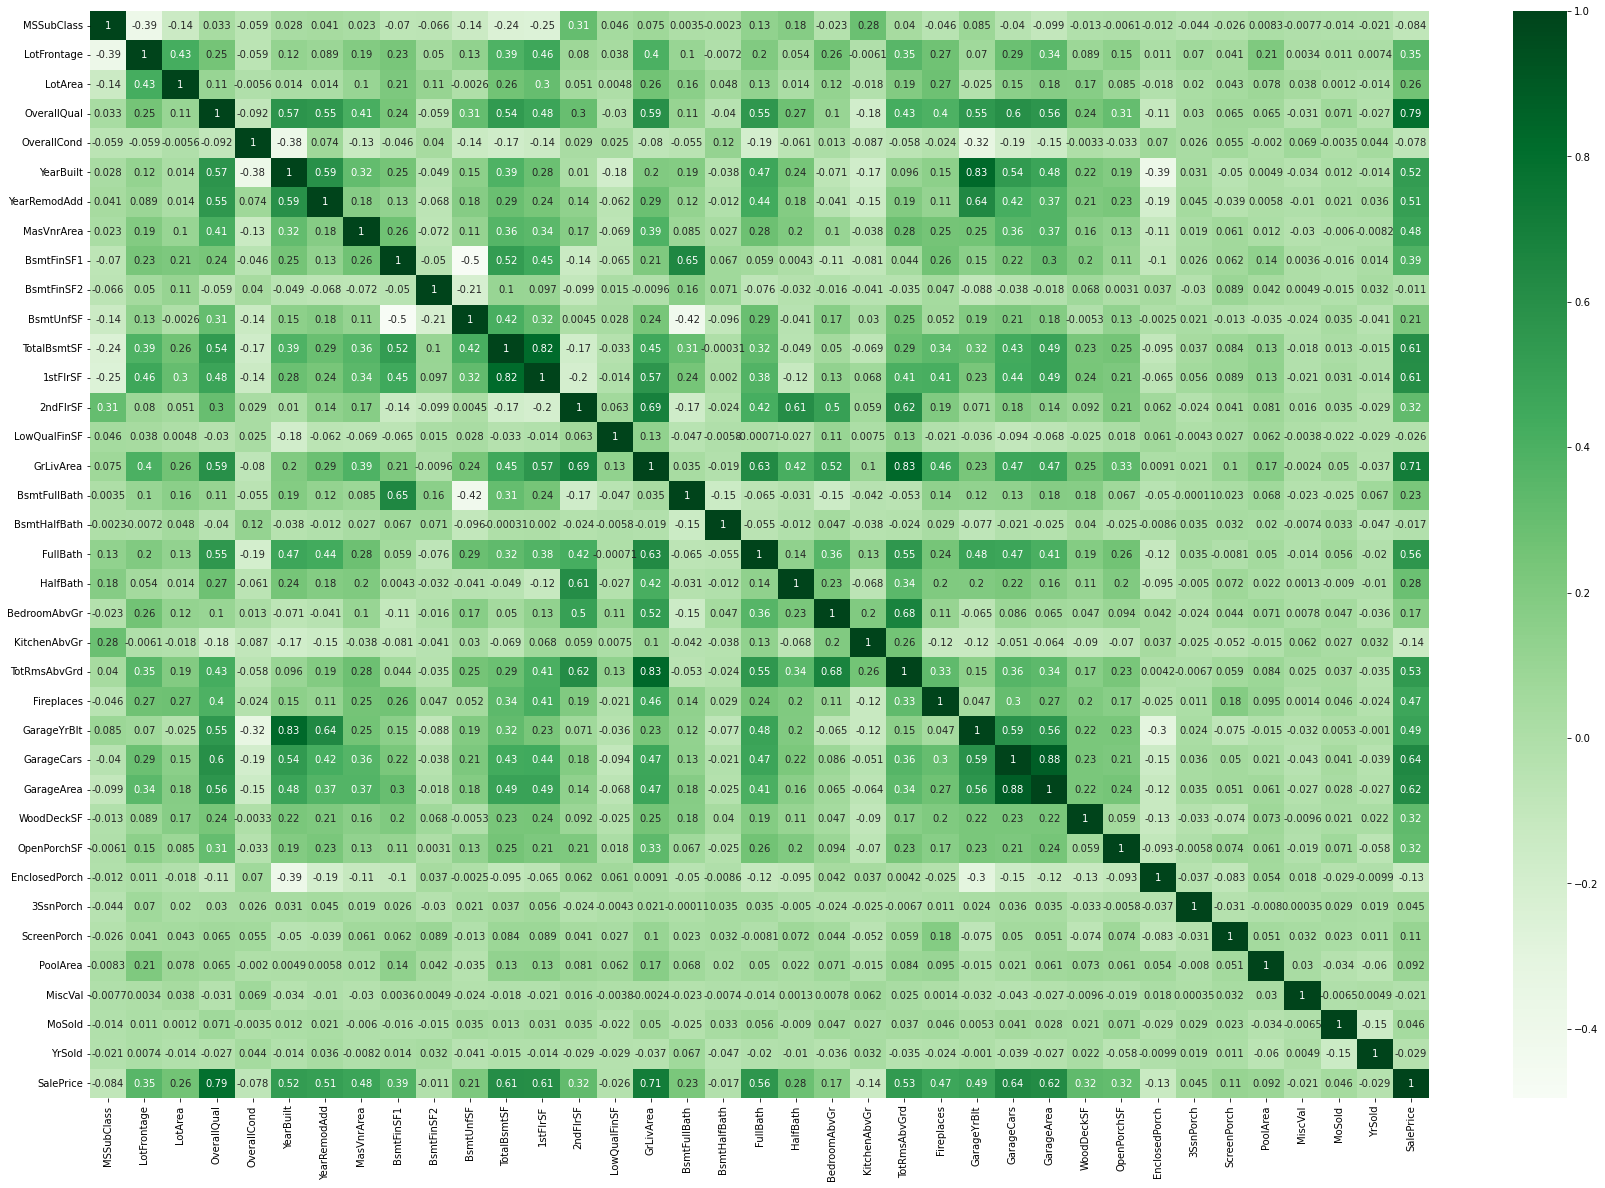

In [6]:
#correlation matrix
x_int = df.select_dtypes(include = ['int64','float64'])
plt.figure(figsize=(30,20))
sns.heatmap(x_int.corr(), annot = True, cmap = 'Greens')
plt.show()

In [7]:
x_int.shape

(1460, 37)

Comments:

1) There is very high correlation between sale price of house and OverallQual, and GrLivArea.

2) There is a very high correlation between predictors/features. For eg. GarageYrBlt and YearBuilt which is 83%, GrLivArea and TotRmsAbvGrd 83% etc. Hence, we can see multicollinearity in dataset among few features. 

In [8]:
#Dropping target SalePrice since we need to perform feature selection and remove multicollinearity 
# x_int.drop(columns = ['SalePrice'], axis = 1, inplace = True)

In [9]:
for col in x_int.corr().columns:
    t = x_int.corr()[[col]]
    temp = t[(t[col]>0.70)&(t[col]<1)]
    if temp.shape[0]>0:
        print(temp)

           OverallQual
SalePrice     0.790982
             YearBuilt
GarageYrBlt   0.825667
          TotalBsmtSF
1stFlrSF      0.81953
             1stFlrSF
TotalBsmtSF   0.81953
              GrLivArea
TotRmsAbvGrd   0.825489
SalePrice      0.708624
           TotRmsAbvGrd
GrLivArea      0.825489
           GarageYrBlt
YearBuilt     0.825667
            GarageCars
GarageArea    0.882475
            GarageArea
GarageCars    0.882475
             SalePrice
OverallQual   0.790982
GrLivArea     0.708624


Comments:

1) As we can see that few features have very high correlation among themselves as we can see from above we have correlation of more than 80% among these features. So, we will take only one feature among them.

2) GarageYrBlt, GarageCars, TotalBsmtSF, TotRmsAbvGrd, GarageArea are features which we will remove before performing modelling to remove multicollinearity.

In [10]:
x_int.shape

(1460, 37)

In [11]:
x_int.drop(columns = ['GarageYrBlt','GarageCars', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [12]:
x_int.isnull().sum()  #To check null values in continuous variable data

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [13]:
#Selecting categorical features
x_categorical = df.select_dtypes(include = ['object'])
x_categorical.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

##### Missing Value Treatment

In [14]:
#Replacing missing value in LotFrontage with the mean of that column
x_int['LotFrontage'] = x_int['LotFrontage'].fillna(x_int['LotFrontage'].mean())
x_int['MasVnrArea'] = x_int['MasVnrArea'].fillna(x_int['MasVnrArea'].mean())

In [15]:
#Replacing categorical features missing values with their actual values using data description information
x_categorical['Alley'] = x_categorical['Alley'].fillna('No alley access')
x_categorical['BsmtQual'] = x_categorical['BsmtQual'].fillna('No Basement')
x_categorical['BsmtCond'] = x_categorical['BsmtCond'].fillna('No Basement')
x_categorical['BsmtExposure'] = x_categorical['BsmtExposure'].fillna('No Basement')
x_categorical['BsmtFinType1'] = x_categorical['BsmtFinType1'].fillna('No Basement')
x_categorical['BsmtFinType2'] = x_categorical['BsmtFinType2'].fillna('No Basement')
x_categorical['FireplaceQu'] = x_categorical['FireplaceQu'].fillna('No Fireplace')
x_categorical['GarageType'] = x_categorical['GarageType'].fillna('No Garage')
x_categorical['GarageFinish'] = x_categorical['GarageFinish'].fillna('No Garage')
x_categorical['GarageQual'] = x_categorical['GarageQual'].fillna('No Garage')
x_categorical['GarageCond'] = x_categorical['GarageCond'].fillna('No Garage')
x_categorical['PoolQC'] = x_categorical['PoolQC'].fillna('No Pool')
x_categorical['Fence'] = x_categorical['Fence'].fillna('No Fence')
x_categorical['MiscFeature'] = x_categorical['MiscFeature'].fillna('None')
x_categorical['MasVnrType'] = x_categorical['MasVnrType'].fillna('None')

In [16]:
final_data = pd.concat([x_int,x_categorical], axis=1)
final_data.dropna(inplace = True)

##### Encoding

In [17]:
#one_hot_encoding for categorical features
alley = pd.get_dummies(final_data['Alley'], drop_first = True)
bsmtqual = pd.get_dummies(final_data['BsmtQual'], drop_first = True)
bsmtcond = pd.get_dummies(final_data['BsmtCond'], drop_first = True)
bsmtexp = pd.get_dummies(final_data['BsmtExposure'], drop_first = True, prefix = 'bsmtexp' )
bsmt_1 = pd.get_dummies(final_data['BsmtFinType1'], drop_first = True, prefix = 'bsmt_1')
bsmt_2 = pd.get_dummies(final_data['BsmtFinType2'], drop_first = True, prefix = 'bsmt_2')
fireplace = pd.get_dummies(final_data['FireplaceQu'], drop_first = True, prefix = 'fireplace')
grt = pd.get_dummies(final_data['GarageType'], drop_first = True, prefix = 'GarageType')
grf = pd.get_dummies(final_data['GarageFinish'], drop_first = True, prefix = 'GarageFinish')
grq = pd.get_dummies(final_data['GarageQual'], drop_first = True, prefix = 'GarageQual')
grc = pd.get_dummies(final_data['GarageCond'], drop_first = True, prefix = 'GarageCond')
pool = pd.get_dummies(final_data['PoolQC'], drop_first = True, prefix = 'PoolQC')
fence = pd.get_dummies(final_data['Fence'], drop_first = True, prefix = 'Fence')
mf = pd.get_dummies(final_data['MiscFeature'], drop_first = True, prefix = 'MiscFeature')
mvt = pd.get_dummies(final_data['MasVnrType'], drop_first = True, prefix = 'MasVnrType')

In [18]:
final_data = final_data.select_dtypes(include =  ['int64','float64'])
final_data = pd.concat([final_data,alley,bsmtqual,bsmtcond,bsmtexp,bsmt_1,bsmt_2,fireplace,grt,grf,grq,grc,pool,fence,mf,mvt], axis = 1)
final_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,1,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,1,0,0,0,1,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,1,0,0,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,1,0,0,0,1,0,0


<Figure size 1440x1440 with 0 Axes>

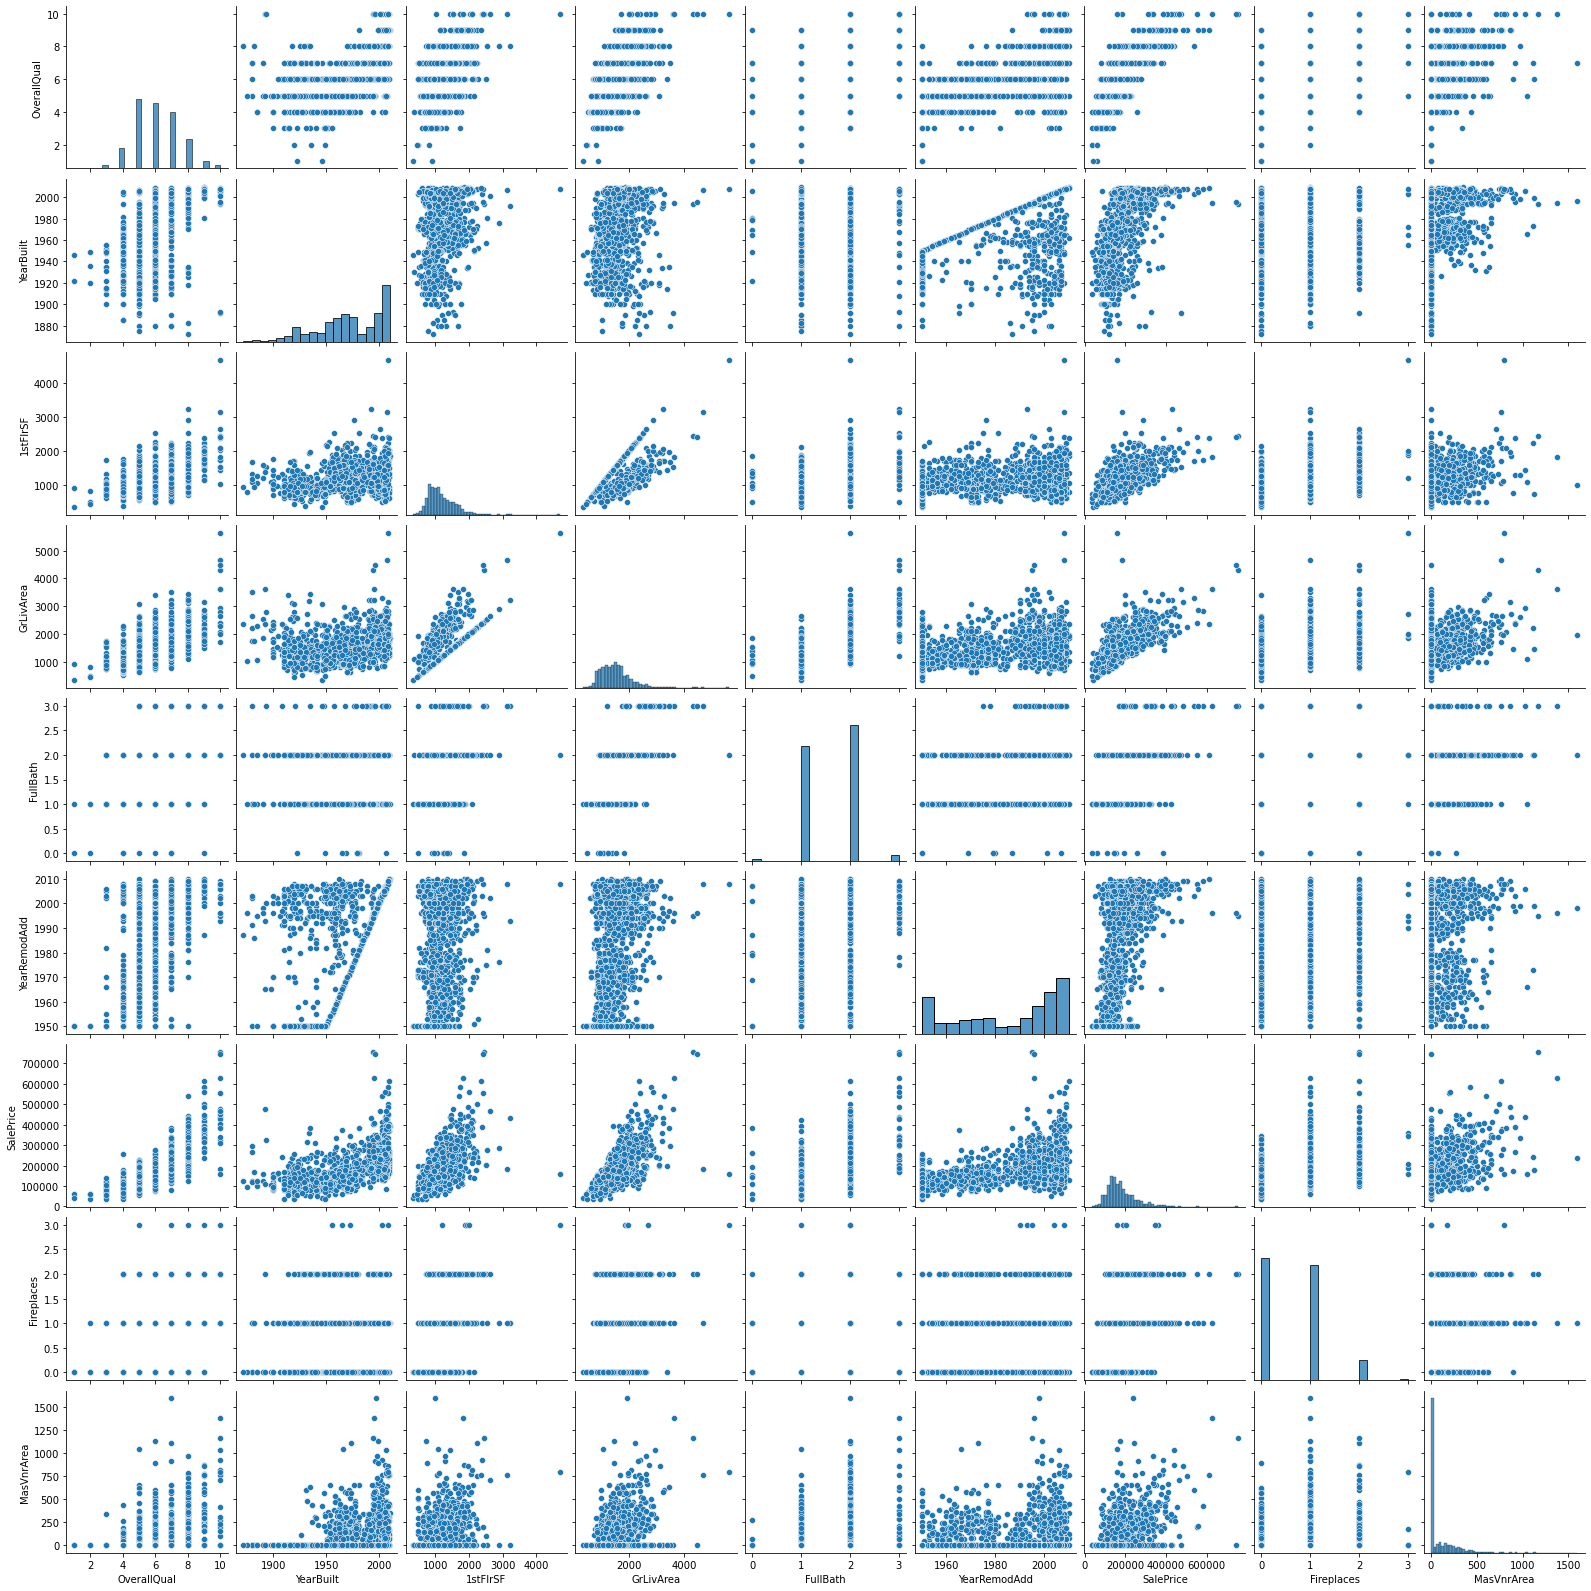

In [33]:
# #pairplot
x = x_int[['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea' ,'FullBath' ,'YearRemodAdd', 'SalePrice','Fireplaces','MasVnrArea']]
plt.figure(figsize = (20,20))
sns.pairplot(x)
plt.show()

Comments:

Note: Have filtered only those features whose correlation with SalePrice was more than 40% to avoid OOM issue.

1) As we can see from the data that there is a linear relationship between SalePrice and (1stFlrSF, GrLivArea) which indicates relationship between target which is increasing in nature.

2) FullBath,OverallQual,Fireplaces shows increasing trend in SalePrice which resembles relationship between these predictors and SalePrice

In [36]:
#Splitting Data into train and test
df_train,df_test = train_test_split(final_data,test_size = 0.3, random_state = 123)
df_train.shape,df_test.shape

((1021, 96), (438, 96))

In [39]:
#Feature Transformation using MinMax Scaler

minmax = MinMaxScaler()
df_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']]  = minmax.fit_transform(df_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']])
df_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']]  = minmax.transform(df_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']])

##### Regression Models

In [255]:
X_train = df_train.drop(columns = ['SalePrice'], axis = 1)
y_train = df_train['SalePrice']
X_test = df_test.drop(columns = ['SalePrice'], axis = 1)
y_test = df_test['SalePrice']
X_train.shape,X_test.shape

((1021, 95), (438, 95))

###### Linear Regression

In [256]:
#Linear Regression Model
lr_model = LinearRegression(n_jobs = -1)
lr_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [257]:
#Train and test predictions
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

In [258]:
#Performance Metrics
r2_score_lr_train = r2_score(y_train,train_pred)
r2_score_lr_test = r2_score(y_test,test_pred)
rss_lr_train = np.square(np.sum(y_train-train_pred))
rss_lr_test = np.square(np.sum(y_test-test_pred))
mse_train_lr = mean_squared_error(y_train,train_pred)
mse_test_lr = mean_squared_error(y_test,test_pred)

print("Train R2 Score:", r2_score_lr_train)
print("Test R2 Score:", r2_score_lr_test)
print('Rss_train:', rss_lr_train)
print('Rss_test:', rss_lr_test)
print('mse_train:',mse_train_lr)
print('mse_test:',mse_test_lr)

Train R2 Score: 0.8788940389086592
Test R2 Score: -4.2394575577084395e+23
Rss_train: 0.0002456875766104228
Rss_test: 2.2583194455007067e+24
mse_train: 0.0015299432088521348
mse_test: 4.6977755670655004e+21


###### Ridge Regression

In [320]:
# alpha values
params = {'alpha': [0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation and hyperparamter tuning
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [321]:
#Best alpha value after hyper parameter tuning using GridSearchCv for ridge regression
model_cv.best_params_

{'alpha': 0.05}

In [322]:
#Training Ridge Regression using best alpha value
ridge = Ridge(alpha = 2*model_cv.best_params_['alpha'])
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [323]:
#Train and test predictions
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

In [324]:
#Performance Metrics
r2_score_ridge_train = r2_score(y_train,train_pred)
r2_score_ridge_test = r2_score(y_test,test_pred)
rss_ridge_train = np.square(np.sum(y_train-train_pred))
rss_ridge_test = np.square(np.sum(y_test-test_pred))
mse_train_ridge = mean_squared_error(y_train,train_pred)
mse_test_ridge = mean_squared_error(y_test,test_pred)

print("Train R2 Score:", r2_score_ridge_train)
print("Test R2 Score:", r2_score_ridge_test)
print('Rss_train:', rss_ridge_train)
print('Rss_test:', rss_ridge_test)
print('mse_train:',mse_train_ridge)
print('mse_test:',mse_test_ridge)

Train R2 Score: 0.8599236292940842
Test R2 Score: 0.822530669642137
Rss_train: 1.5186805020668885e-28
Rss_test: 0.7651122766827697
mse_train: 0.0017695982109463102
mse_test: 0.0019665513163181466


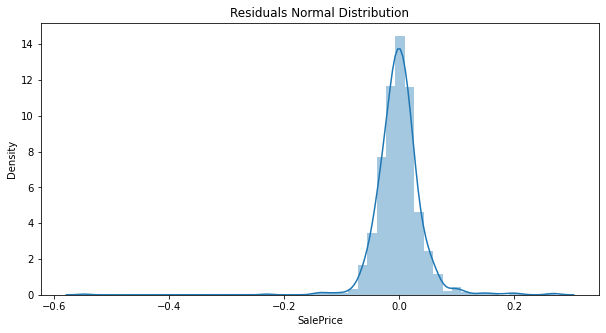

In [300]:
plt.figure(figsize = (10,5))
sns.distplot(y_train-train_pred, kde = True)
plt.title('Residuals Normal Distribution')
plt.show()

###### Lasso Regression

In [325]:
# alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation and hyperparamter tuning
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [326]:
#Best alpha value after hyper parameter tuning using GridSearchCv for Lasso regression
model_cv.best_params_

{'alpha': 0.0001}

In [327]:
#Training Lasso Regression using best alpha value
lasso = Lasso(alpha = 2*model_cv.best_params_['alpha'])
lasso.fit(X_train,y_train)

Lasso(alpha=0.0002)

In [328]:
#Train and test predictions
train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

In [329]:
#Performance Metrics
r2_score_lasso_train = r2_score(y_train,train_pred)
r2_score_lasso_test = r2_score(y_test,test_pred)
rss_lasso_train = np.square(np.sum(y_train-train_pred))
rss_lasso_test = np.square(np.sum(y_test-test_pred))
mse_train_lasso = mean_squared_error(y_train,train_pred)
mse_test_lasso = mean_squared_error(y_test,test_pred)

print("Train R2 Score:", r2_score_lasso_train)
print("Test R2 Score:", r2_score_lasso_test)
print('Rss_train:', rss_lasso_train)
print('Rss_test:', rss_lasso_test)
print('mse_train:',mse_train_lasso)
print('mse_test:',mse_test_lasso)

Train R2 Score: 0.8301615164651577
Test R2 Score: 0.8393064133691917
Rss_train: 2.5098911628248896e-27
Rss_test: 0.6996502275928421
mse_train: 0.0021455858336312432
mse_test: 0.0017806580082060856


In [312]:
#Performance Metrics DataFrame

metric = pd.DataFrame()
metric['Metrics'] = ['Train R2', 'Test R2', 'Train_Rss', 'Test_Rss', 'MSE_Train', 'MSE_Test']
metric['Linear Regression'] = [r2_score_lr_train,r2_score_lr_test,rss_lr_train,rss_lr_test,mse_train_lr,mse_test_lr]
metric['Ridge Regression'] = [r2_score_ridge_train,r2_score_ridge_test,rss_ridge_train,rss_ridge_test,mse_train_ridge,mse_test_ridge]
metric['Lasso Regression'] = [r2_score_lasso_train,r2_score_lasso_test,rss_lasso_train,rss_lasso_test,mse_train_lasso,mse_test_lasso]
metric

,Metrics,Linear Regression,Ridge Regression,Lasso Regression
0,Train R2,8.788940e-01,8.662768e-01,8.425420e-01
1,Test R2,-4.239458e+23,8.095196e-01,8.361793e-01
2,Train_Rss,2.456876e-04,3.330366e-26,3.646510e-28
3,Test_Rss,2.258319e+24,6.384740e-01,6.787510e-01
4,MSE_Train,1.529943e-03,1.689339e-03,1.989182e-03
5,MSE_Test,4.697776e+21,2.110728e-03,1.815310e-03


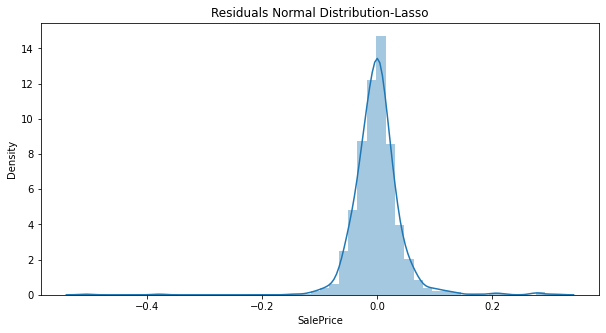

In [315]:
plt.figure(figsize = (10,5))
sns.distplot(y_train-train_pred, kde = True)
plt.title('Residuals Normal Distribution-Lasso')
plt.show()

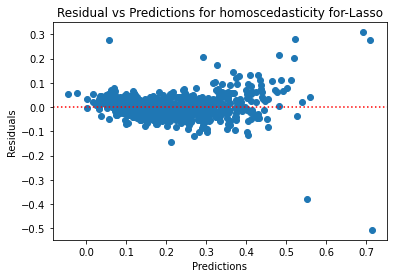

In [316]:
plt.scatter(train_pred,y_train-train_pred)
plt.axhline(y = 0, color = 'r', linestyle = ':')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residual vs Predictions for homoscedasticity for-Lasso')
plt.show()

Comments:

1) As we can see from above metric dataframe that Lasso Regression is performing best followed by Ridge and worst by Linear Regression. Models have been evaluated on Test R2 score. Hence best model for this case study will be Lasso Regression with alpha = 0.0001

2) As we can see from above charts for lasso that Lasso Regression is following all assumptions of Regression model:

    a) There is a linear relationship between Predictors (1stFlrSF, GrLivArea) and target.
    b) The model has no cyclic pattern between residuals and are independent.
    c) Residuals have constant variance (homoscedasticity).
    d) Residuals follows normal distribution.

In [336]:
#Feature Coefficients

coeff = pd.DataFrame()
coeff['features'] = X_train.columns
coeff['coef'] = lasso.coef_
coeff.sort_values(by = ['coef'], ascending = False, inplace = True)
coeff.head()

,features,coef
14,GrLivArea,0.351590
3,OverallQual,0.204201
7,MasVnrArea,0.050537
5,YearBuilt,0.049714
21,Fireplaces,0.037746
